### Table of Content
 - [About the Data](#about_the_data)
 - [Objective](#objective)
 - [Loading the Data](#loading_the_data)
 - [Data Validation](#data_validation)
 - [Solution (Merging)](#solution)
 - [Visualization](#visualization)

## About the Data  <a class="anchor" id="about_the_data"></a>

 - `outcome_interview.csv` contains the matchup data for various mixed martial arts fights - including the two fighters involved, the winner, and the event where it took place - all encoded in IDs.
 - `event_interview.csv` contains event data for various mixed martial arts events - most importantly the event name. The id corresponds to the event_id in the outcome csv.
 - `fighter_interview.csv` contains fighter data for various mixed martial arts fighters - their names and their nationalities. The id corresponds to both fighter1_id and fighter2_id in the outcome csv.

## Objective <a class="anchor" id="objective"></a>

Using the above csv’s create a pandas dataframe and corresponding exported csv of all the matchups (reminder: matchups are listed in the outcome csv) with ONLY the following columns:

`| fighter1_name | fighter2_name | fighter1_nationality | fighter2_nationality | event_name |`

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('fivethirtyeight')

## Loading the Data <a class="anchor" id="loading_the_data"></a>

In [2]:
# Read the 3 provided csv files
outcome = pd.read_csv("outcome_interview.csv")
event = pd.read_csv("event_interview.csv")
fighter = pd.read_csv("fighter_interview.csv")

Now we have three dataframes `outcome`, `event` and `fighter`

In [3]:
print("Number of rows and columns in outcome dataframe:", outcome.shape)
outcome.head()

Number of rows and columns in outcome dataframe: (8371, 5)


,id,fighter1_id,fighter2_id,winner_id,event_id
0,2264,803,138,138.0,18
1,2272,3025,466,466.0,494
2,2280,3005,1671,1671.0,375
3,2292,2110,284,284.0,352
4,2310,1346,607,1346.0,826


In [4]:
print("Number of rows and columns in event dataframe:", event.shape)
event.head()

Number of rows and columns in event dataframe: (1612, 8)


,id,name,date,promoter,location,attendance,created_at,modified_at
0,1,One FC 10: Champions and Warriors,2013-09-13,OneFC,NaN,NaN,2019-04-01T19:56:24.477518,2019-04-01T19:56:24.477518
1,2,Legacy FC 45: Todhunter vs. Smith,2015-09-11,Legacy Fc,NaN,NaN,2019-04-01T19:56:28.403410,2019-04-01T19:56:28.403410
2,3,LFA 27: Watley vs. Wilson,2017-11-10,LFA,NaN,NaN,2019-04-01T19:56:32.488043,2019-04-01T19:56:32.488043
3,4,ONE FC 21: Roar of Tigers,2014-10-17,OneFC,NaN,NaN,2019-04-01T19:56:39.395144,2019-04-01T19:56:39.395144
4,5,One FC 8: Kings and Champions,2013-04-05,OneFC,NaN,NaN,2019-04-01T19:56:39.404131,2019-04-01T19:56:39.404131


In [5]:
print("Number of rows and columns in fighter dataframe:", fighter.shape)
fighter.head()

Number of rows and columns in fighter dataframe: (5529, 3)


,id,name,nationality
0,111,Bertrand Amoussou,France
1,3227,Dave Zitanick,United States
2,2002,Jim Mullen,United States
3,2033,Mario Neto,Brazil
4,1667,Aaron Lanfranco,United States


## Data Validation <a class="anchor" id="data_validation"></a>

All `event_id` in `outcome` data should be present in `id` of `event` data

In [6]:
outcome["event_id"].isin(event["id"]).value_counts()

True    8371
Name: event_id, dtype: int64

All `fighter1_id` in `outcome` data should be present in `id`of `fighter` data

In [7]:
outcome["fighter1_id"].isin(fighter["id"]).value_counts()

True    8371
Name: fighter1_id, dtype: int64

All `fighter2`_id in `outcome` data should be present in `id`of `fighter` data

In [8]:
outcome["fighter2_id"].isin(fighter["id"]).value_counts()

True    8371
Name: fighter2_id, dtype: int64

## Solution (Merging) <a class="anchor" id="solution"></a>

Step 1 : Merge outcome datarame to event dataframe to add event name and ceate a new merged dataframe called `df_merge`

**Please note**, I have taken left join to preserve the sequence of row as it appears in `outcome` dataset. If I take inner join the sequence of rows will not be preserved and will have to add additional step in the end to make the rows in same sequence as in outcome dataframe

In [9]:
# Adding event name to outcome dataframe
df_merge = pd.merge(outcome, event[["id", "name"]], 
                    how="left", 
                    left_on="event_id", 
                    right_on="id")                                   
# df_merge.head()

Step 2 : Rename the column named "name" to "event_name"

In [10]:
df_merge = df_merge.rename(columns={"name":"event_name"}) 

Step 3 : Merge df_merge dataframe and fighter dataframe on `fighter1_id` to fetch the fighter name and nationality for fighter 1

In [11]:
df_merge = pd.merge(df_merge, fighter, how="left", left_on="fighter1_id", right_on="id")
# df_merge.head()

Step 4 : Rename the columns for Fighter 1

In [12]:
df_merge = df_merge.rename(columns = {"name":"fighter1_name", "nationality":"fighter1_nationality"})

Step 5 : Merge df_merge dataframe and fighter dataframe on `fighter2_id` to fetch the fighter name and nationality for fighter 2

In [13]:
df_merge = pd.merge(df_merge, fighter, how="left", left_on="fighter2_id", right_on="id")

Step 6 : rename the columns for Fighter 2

In [14]:
df_merge = df_merge.rename(columns = {"name":"fighter2_name", "nationality":"fighter2_nationality"})
# df_merge.head()

Step 7 : Select the required columns as advised in objective

`| fighter1_name | fighter2_name | fighter1_nationality | fighter2_nationality | event_name |`

In [15]:
required_columns = ["fighter1_name","fighter2_name","fighter1_nationality","fighter2_nationality","event_name"]
output_df = df_merge[required_columns]

In [16]:
output_df.head()

,fighter1_name,fighter2_name,fighter1_nationality,fighter2_nationality,event_name
0,Mike Easton,Raphael Assuncao,United States,Brazil,UFC on FOX 5: Henderson vs. Diaz
1,Bobby Voelker,Patrick Cote,United States,Canada,UFC 158: St-Pierre vs. Diaz
2,Jamie Varner,Joe Lauzon,United States,United States,UFC on FOX 4: Shogun vs. Vera
3,Andy Ogle,Maximo Blanco,England,Venezuela,UFC Fight Night 41: Munoz vs. Mousasi
4,Anthony Johnson,Phil Davis,United States,United States,UFC 172: Jones vs. Teixeira


Step 8 : Write the output to a csv file

In [17]:
output_df.to_csv("output_file.csv",index=False)

## Visualization <a class="anchor" id="visualization"></a>

Distribution of fighters from various nationalities

In [18]:
fighter_country_count = fighter.nationality.value_counts().head(15).reset_index()
fighter_country_count = fighter_country_count.rename(columns={"index":"nationality", "nationality":"n"})
fighter_country_count

,nationality,n
0,United States,2630
1,Brazil,509
2,Japan,245
3,England,198
4,Russia,172
5,Canada,147
6,Poland,105
7,France,75
8,Australia,71
9,Sweden,60


Text(0, 0.5, 'Nationality')

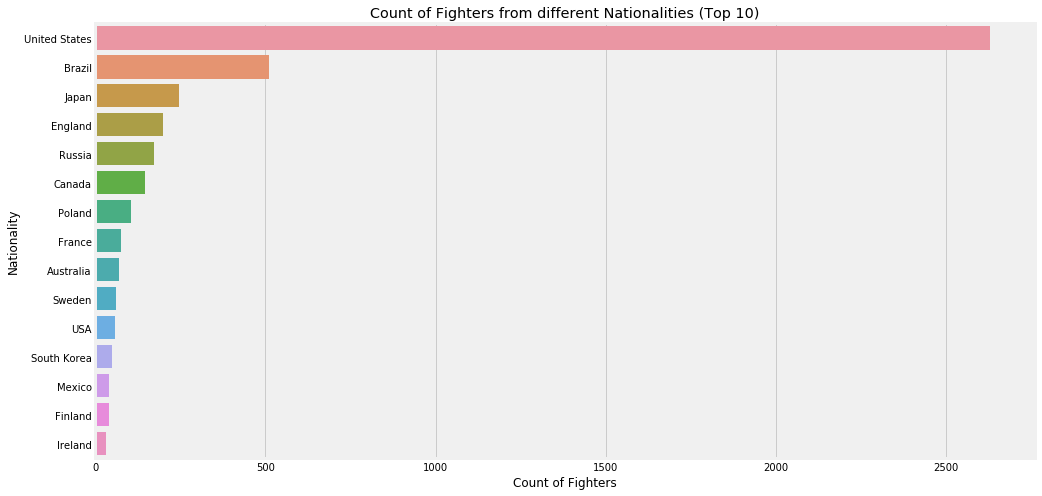

In [19]:
plt.figure(figsize=(15,8))
ax=sns.barplot(y="nationality", x="n", data=fighter_country_count);
ax.set_title("Count of Fighters from different Nationalities (Top 10)")
ax.set_xlabel("Count of Fighters")
ax.set_ylabel("Nationality")

As we can see from the plot, maximum number of fighters are from United States followed by Brazil and Japan